In [ ]:
Breast Cancer Case Study

In [ ]:
Targets:
-Train two classic classification models(KNN, Logstic Regression) on breast cancer dataset
-Make comparison between two models
-Test!(ROC and AUC curve)

In [ ]:
Step1: Load the data

In [2]:
from sklearn.datasets import load_breast_cancer #load the dataset
from sklearn.model_selection import train_test_split # cv
from sklearn import metrics #roc auc curve

data = load_breast_cancer()
X = data.data
t = data.target
print(X.size)

17070


In [ ]:
Step2: split the dataset into train set and test set!

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, t, test_size=0.30, random_state=123)

In [ ]:
Step3: Let's train the KNN first

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import pylab as plt

knn = KNeighborsClassifier(10).fit(X_train, y_train) #train the data on train dataset

knn_predic = knn.predict(X_test) # make prediction

knn_predic_prob = knn.predict_proba(X_test)[:, 1] # get the probability

fpr, tpr, _ = metrics.roc_curve(y_test,  knn_predic_prob)
auc = metrics.roc_auc_score(y_test, knn_predic_prob)

print(fpr)
print(tpr)
print(auc)
print(knn_predic_prob)

[0.         0.02941176 0.04411765 0.05882353 0.08823529 0.10294118
 0.16176471 0.20588235 0.23529412 0.26470588 0.38235294 1.        ]
[0.         0.77669903 0.93203883 0.97087379 0.97087379 0.97087379
 0.97087379 0.98058252 0.99029126 0.99029126 1.         1.        ]
0.9738006853226728
[1.  1.  0.1 1.  0.  0.9 1.  1.  0.1 1.  0.9 0.  0.5 1.  1.  0.9 1.  1.
 1.  0.9 0.  0.1 0.8 1.  0.8 0.  0.  1.  0.  1.  0.5 1.  1.  0.9 0.  1.
 0.9 1.  1.  0.  0.  0.8 0.  0.9 0.  0.9 0.  0.  0.5 0.  0.4 0.  1.  0.9
 1.  0.4 1.  0.  0.  1.  0.1 1.  1.  1.  0.9 0.  1.  1.  1.  0.7 1.  1.
 0.1 1.  0.  1.  0.9 0.  0.  0.1 0.9 0.  0.  1.  1.  1.  0.2 1.  0.  1.
 0.3 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.9 1.  1.  1.
 1.  1.  1.  1.  1.  0.  0.8 0.  1.  0.  1.  1.  0.9 1.  1.  1.  0.  1.
 0.  0.5 1.  1.  0.  1.  1.  0.2 0.1 1.  0.8 1.  0.1 0.  0.  1.  0.  1.
 0.  1.  0.7 0.  1.  0.  0.9 0.3 1.  1.  0.6 1.  0.1 0.  0.  0.9 0.4 1.
 0.  0.3 1.  1.  1.  0.4 0.  0.  0.9]


In [ ]:
Step4: Train the Logstic Regression model

In [7]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression().fit(X_train, y_train) #train the model

lg_predict = lg.predict(X_test)

lg_predict_prob = lg.predict_proba(X_test)[:, 1]

fpr2, tpr2, _ = metrics.roc_curve(y_test,  lg_predict_prob)
auc2 = metrics.roc_auc_score(y_test, lg_predict_prob)

print(fpr2)
print(tpr2)
print(auc2)

[0.         0.         0.         0.01470588 0.01470588 0.02941176
 0.02941176 0.16176471 0.16176471 0.22058824 0.22058824 1.        ]
[0.         0.00970874 0.85436893 0.85436893 0.94174757 0.94174757
 0.98058252 0.98058252 0.99029126 0.99029126 1.         1.        ]
0.9938606510565391


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Step5: plot the roc and auc

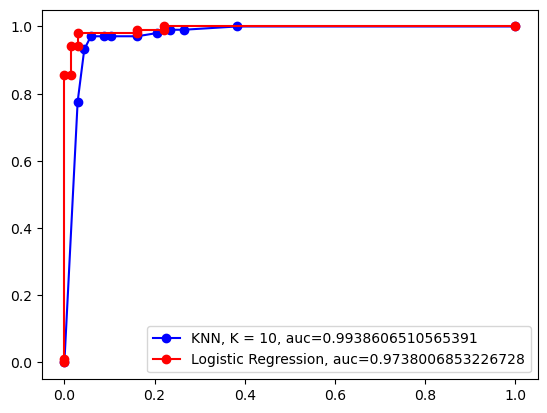

In [9]:
plt.plot(fpr,tpr,'bo-',label="KNN, K = 10, auc="+str(auc2))
plt.plot(fpr2,tpr2,'ro-',label="Logistic Regression, auc="+str(auc))
plt.legend(loc=4)
plt.show()

0.9736579097658481


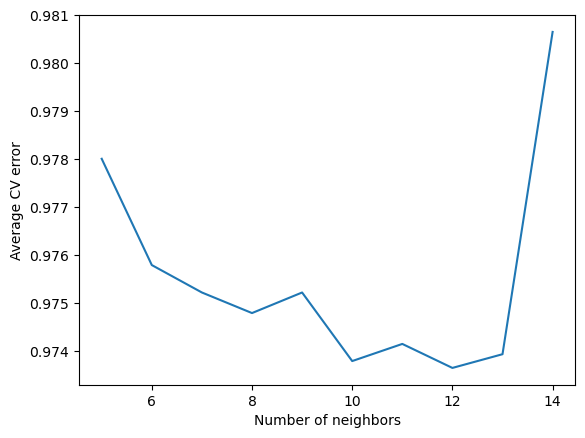

In [18]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = []
for i in range(5,15,1):
    knn_cv = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    knn_predic = knn.predict(X_test) # make prediction

    knn_predic_prob = knn_cv.predict_proba(X_test)[:, 1] # get the probability

    fpr, tpr, _ = metrics.roc_curve(y_test,  knn_predic_prob)
    auc = metrics.roc_auc_score(y_test, knn_predic_prob)
    
    cv_scores.append(auc)
    
plt.plot(np.arange(5,15,1),cv_scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Average CV error')
print(np.min(cv_scores))